# Gradient Descent (GD) and Stochastic Gradient Descent (SGD)

[cs229_code_example](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://cs229.stanford.edu/notes-spring2019/Gradient_Descent_Viz.pdf)

    
## Aim:

*   Write Gradient Descent and SGD from Scartch (using numpy)
*   Compare with sklearn Gradient Descent and SGD package


## Content
* Load Dataset
* Write our own Gradient Descent (GD)
* sklearn Gradient Descent (OLS)
* Write our own Stochastic Descent (SGD)
* sklearn SGD
* Compare 4 Models MSE

* **Batch gradient descent**: use **all m examples** in each iteration

* **Stochastic gradient descent**: use **1 example** in each iteration


![link text](https://yyqing.me/2017/2017-08-10/batch-vs-stochastic.png)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from numpy import linalg as LA

<h1> Load Dataset

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
pass

In [3]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# standard sclaer
from sklearn.preprocessing import StandardScaler
def std_scaler(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  # add a column of 1 for X
  X_train_scale=np.append(np.ones(shape=(X_train.shape[0],1)),X_train_scale,axis=1)
  X_test_scale=np.append(np.ones(shape=(X_test.shape[0],1)),X_test_scale,axis=1)
  return X_train_scale, X_test_scale

X_train,X_test=std_scaler(X_train,X_test)

<h1> Gradient Descent


![link text](https://images.slideplayer.com/23/6897901/slides/slide_6.jpg)

In [5]:
# function for: define cost function ; calculate the gradient
def cost_function(X,theta,y):
  m=y.size
  y_pred=np.matmul(X,theta.T)
  error=y_pred-y
  cost = 0.5 * m * np.dot(error.T, error)
  gradient = (1/m)* np.dot(X.T,error)
  return cost,gradient

In [6]:
# function for: using iteration calculate theta
def gradient_descent(X, y, theta_init, alpha, iters):
  cost_array={}
  theta=theta_init
  m=y.size
  for i in range(iters):
    cost,gradient=cost_function(X,theta,y)
    theta=theta-alpha * gradient
    cost_array[i]=cost
  return theta, cost_array

In [7]:
 # Set hyperparameters
alpha = 0.01
iterations = 1500

# Initialize Theta Values to 0
theta_init = np.zeros(X_train.shape[1])

# Run Gradient Descent
theta, cost_array = gradient_descent(X_train, y_train, theta_init, alpha, iterations)

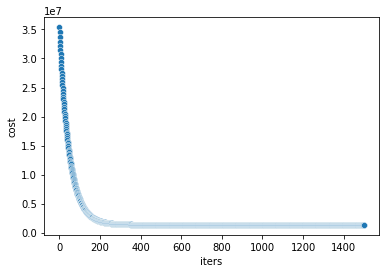

In [8]:
# function for: display the cost-iter trend
def plot_cost_iter(cost_array):
  iters=cost_array.keys()
  cost=cost_array.values()
  fig=sns.scatterplot(x=iters,y=cost)
  fig.set_xlabel('iters')
  fig.set_ylabel('cost')

# display
plot_cost_iter(cost_array)

<h2> Plot the Result (MSE + scatterplot)

In [9]:
# scatterplot the y_pred and y_actual, display the MSE, theta
def plot_pred_actual(theta,X_test,y_test):
  num_of_pt=y_test.size
  y_test_pred=np.matmul(X_test,theta.T)
  mse=mean_squared_error(y_test,y_test_pred)
  # plot the graph
  fig, ax1 = plt.subplots(1,1,constrained_layout=True)
  sns.scatterplot(x=y_test_pred,y=y_test,ax=ax1)
  xpoints = ypoints = plt.xlim()
  plt.plot(xpoints, ypoints, linestyle='--', color='k')
  ax1.set_xlabel('y_pred')
  ax1.set_ylabel('y_actual')
  ax1.text(0,0.92,f'The MSE = {mse}',transform=ax1.transAxes)
  ax1.text(0,0.85,f'The num of Point = {num_of_pt}',transform=ax1.transAxes)
  return mse

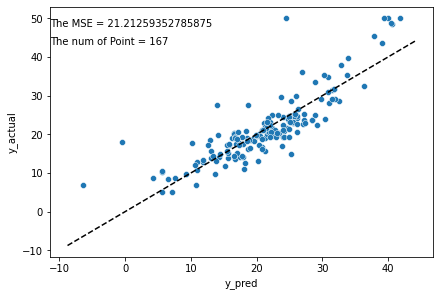

In [10]:
# test set result
mse_GD=plot_pred_actual(theta,X_test,y_test)


## Compare to sklearn package : linear_model.LinearRegression

* sklearn linear_model web link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

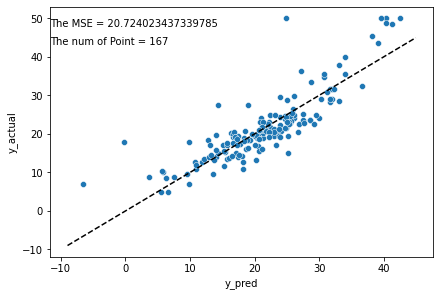

In [11]:
from sklearn import linear_model
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)

# Train the model using the training sets
regr.fit(X_train,y_train)

# plot the y_test - y_actual for scikit regr model
mse_sklearn_OLS=plot_pred_actual(theta=regr.coef_,
                 X_test=X_test,
                 y_test=y_test)

# Stochastic Gradient Descent

![link text](https://yyqing.me/2017/2017-08-10/batch-vs-stochastic.png)

In [12]:
# function for: define cost function ; calculate the gradient
def SGD_cost_function(X,theta,y,lam):
  m=y.size
  y_pred=X@theta
  error=y_pred-y
  cost = 0.5  * np.dot(error.T, error) * (1/m) + lam*LA.norm(theta, 2)
  return cost

In [13]:
# function for: using iteration calculate theta
def SGD(X, y, alpha, iters,lam):
  cost_array={}
  m,n=X.shape
  theta=np.zeros(n)
  # SGD_gradient
  for iter in range(iters):
    # for each point
    for i in range(m):
      SGD_grad=(X[i,:]@theta-y[i])*X[i,:]+lam*theta
      theta=theta-alpha*SGD_grad
      cost=SGD_cost_function(X,theta,y,lam)
      cost_array[iter]=cost
  return theta, cost_array

In [14]:
theta_SGD,cost_SGD=SGD(X=X_train, y=y_train,
                       alpha=0.001, 
                       iters=500,
                       lam=0.01)

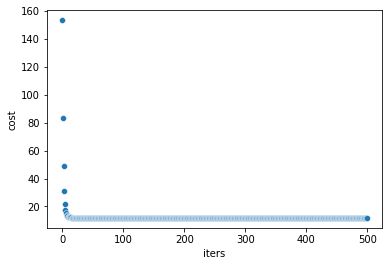

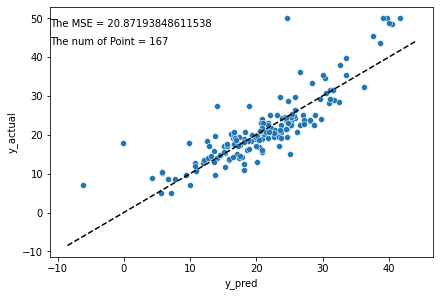

In [15]:
# display the cost along the iters
plot_cost_iter(cost_SGD)

# plot the y_test - y_actual
mse_SGD=plot_pred_actual(theta=theta_SGD,
                 X_test=X_test,
                 y_test=y_test)


## Sklearn SGD Package

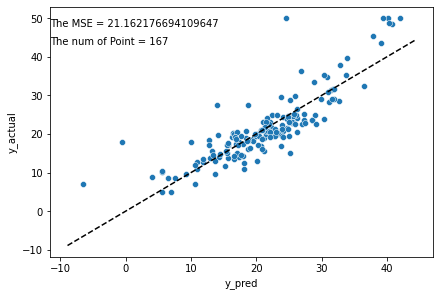

In [16]:
from sklearn.linear_model import SGDRegressor

# SGD to fit the X_train
reg_SGD = SGDRegressor(max_iter=1500, tol=1e-3,fit_intercept=False)
reg_SGD.fit(X_train, y_train)

# plot the result on X_test
mse_sklearn_SGD=plot_pred_actual(theta=reg_SGD.coef_,
                 X_test=X_test,
                 y_test=y_test)

# Compare Model MSE for our created(own) algorithm VS sklearn
* own - Gradient Descent
* sklearn OLS (GD)
* own - Stochastic Gradient Descent
* sklearn SGD

Text(0.5, 1.0, 'MSE Compare on X_test')

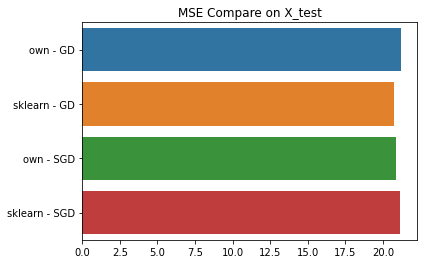

In [17]:
# compare the mse for our gradient descent regression VS sklearn package
fig=sns.barplot(x=[mse_GD,mse_sklearn_OLS,mse_SGD,mse_sklearn_SGD],
                y=['own - GD','sklearn - GD','own - SGD','sklearn - SGD'])
fig.set_title('MSE Compare on X_test')